In [4]:
import numpy as np
import matplotlib.pyplot as plt
from dspmini import *
import numpy as np
import matplotlib.pyplot as plt
import math


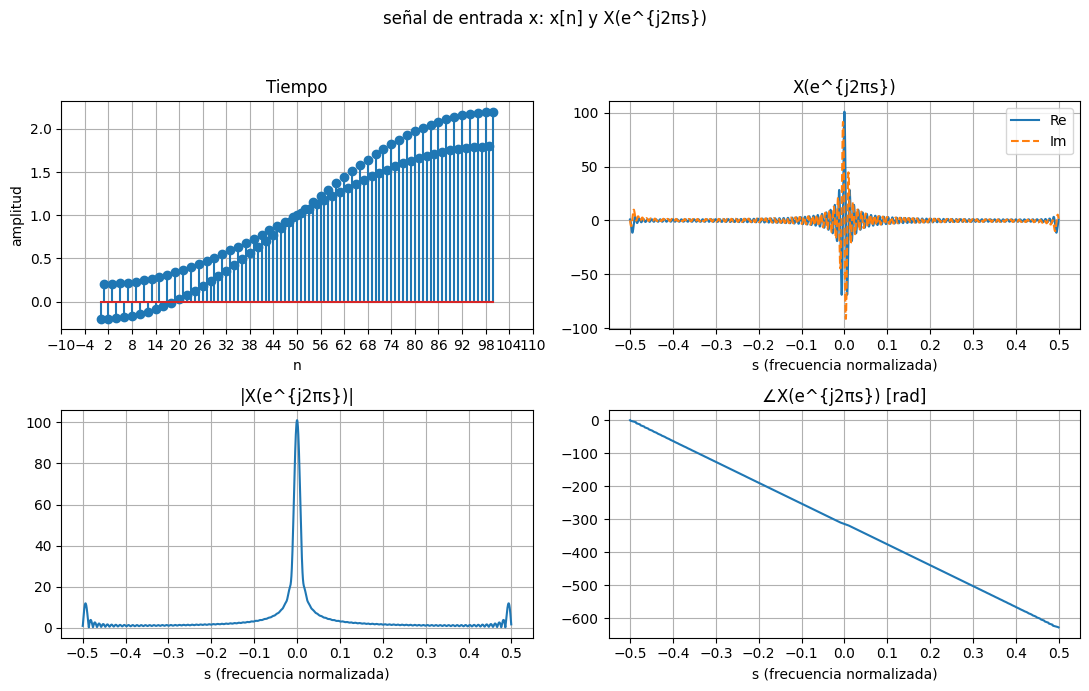

In [6]:
    
# Señal importada de csv
data = np.loadtxt("../data/senial_14253.csv", delimiter=",")
nx = data[:, 0].astype(int)
x = data[:, 1]
pairs = list(zip(nx, x))

# Defino en tiempo x[n] y frecuencia X(e^j2πs)
nx, x = signal_from_pairs(pairs)
sX, X = tftd_numeric(nx, x, N_window=None)

plot_grid_time_freq(nx, x, sX, X, title_prefix="señal de entrada x: x[n] y X(e^{j2πs})")


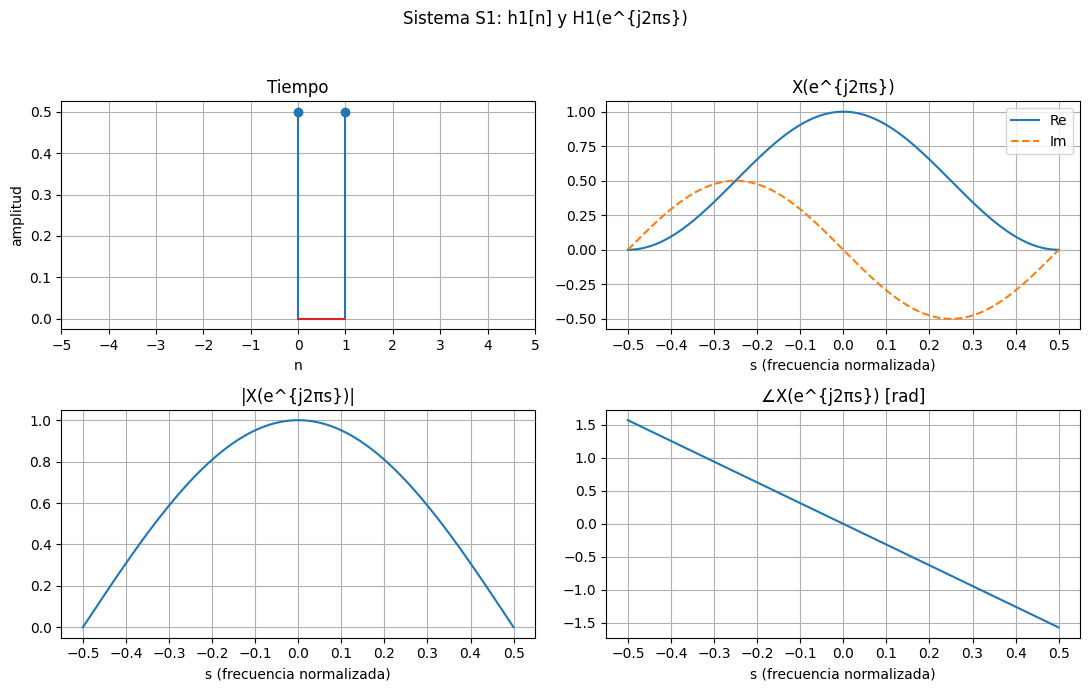

In [7]:
# ============
#  S1 System
# ============
pairs_h1 = [(0, 0.5), (1, 0.5)]   # y[n] = 0.5 x[n] + 0.5 x[n-1]
nh1, h1 = signal_from_pairs(pairs_h1)

# Espectro de H1 y de Y1 en la MISMA rejilla sX
sH, H1 = tftd_numeric(nh1, h1, s=sX, N_window=None)
plot_grid_time_freq(nh1, h1, sH, H1, title_prefix="Sistema S1: h1[n] y H1(e^{j2πs})")

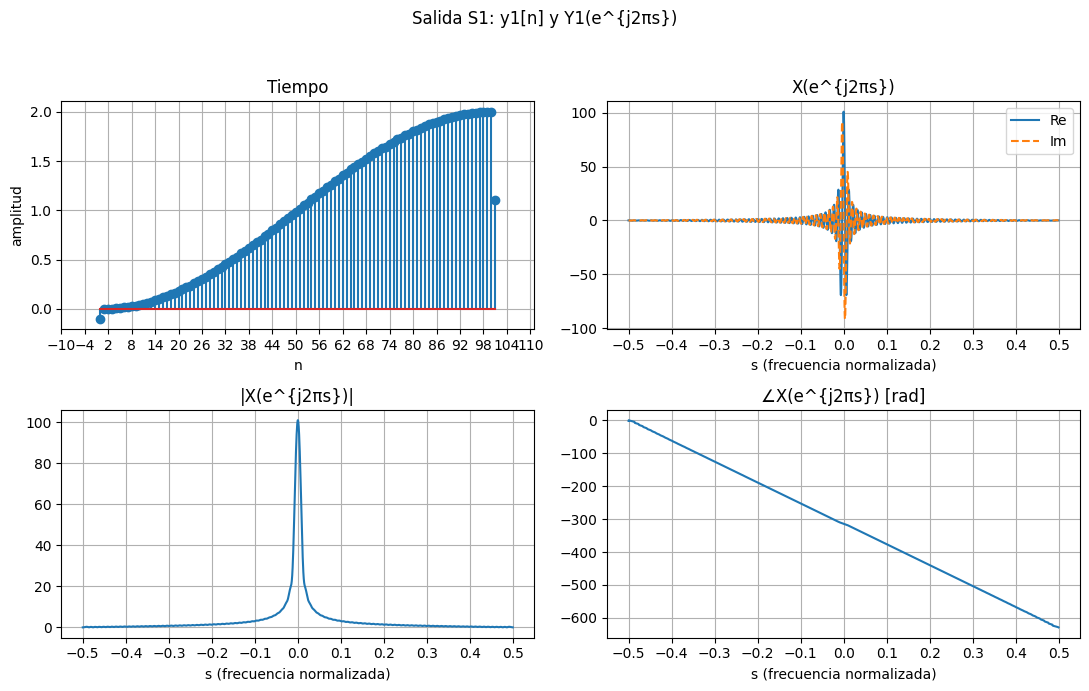

In [8]:
# ------------------------------------------------------------
# Grilla B: y1 y Y1
# ------------------------------------------------------------
ny1, y1 = conv_discrete(nx, x, nh1, h1)
sY, Y1 = tftd_numeric(ny1, y1, s=sX, N_window=None)
plot_grid_time_freq(ny1, y1, sY, Y1, title_prefix="Salida S1: y1[n] y Y1(e^{j2πs})")

# ------------------------------------------------------------
# Verificación espectral: Y1 ≈ X1 · H1 (misma rejilla sX)
# ------------------------------------------------------------
if sX.shape == sH.shape and np.allclose(sX, sH):
    err_max = np.max(np.abs(Y1 - X * H1))
else:
    print("Advertencia: las rejillas de frecuencia no coinciden; omitiendo verificación.")

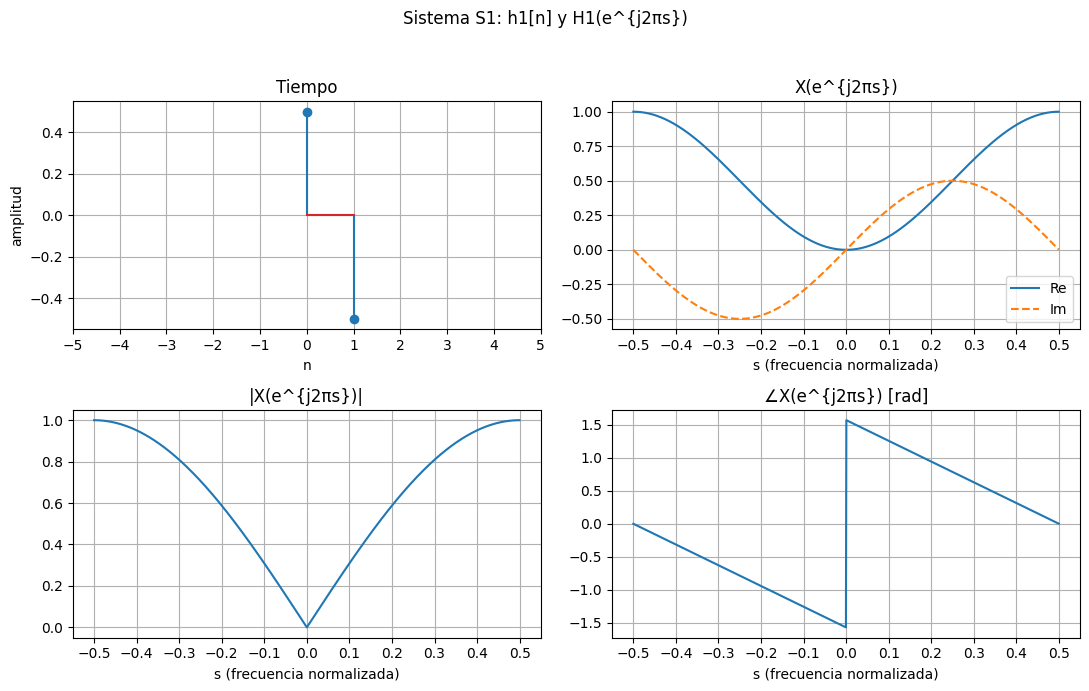

In [9]:
# ============
#  S1 System
# ============
pairs_h1 = [(0, 0.5), (1, -0.5)]   # y[n] = 0.5 x[n] - 0.5 x[n-1]
nh1, h1 = signal_from_pairs(pairs_h1)

# Espectro de H1
sH, H1 = tftd_numeric(nh1, h1, s=sX, N_window=None)

plot_grid_time_freq(nh1, h1, sH, H1, title_prefix="Sistema S1: h1[n] y H1(e^{j2πs})")

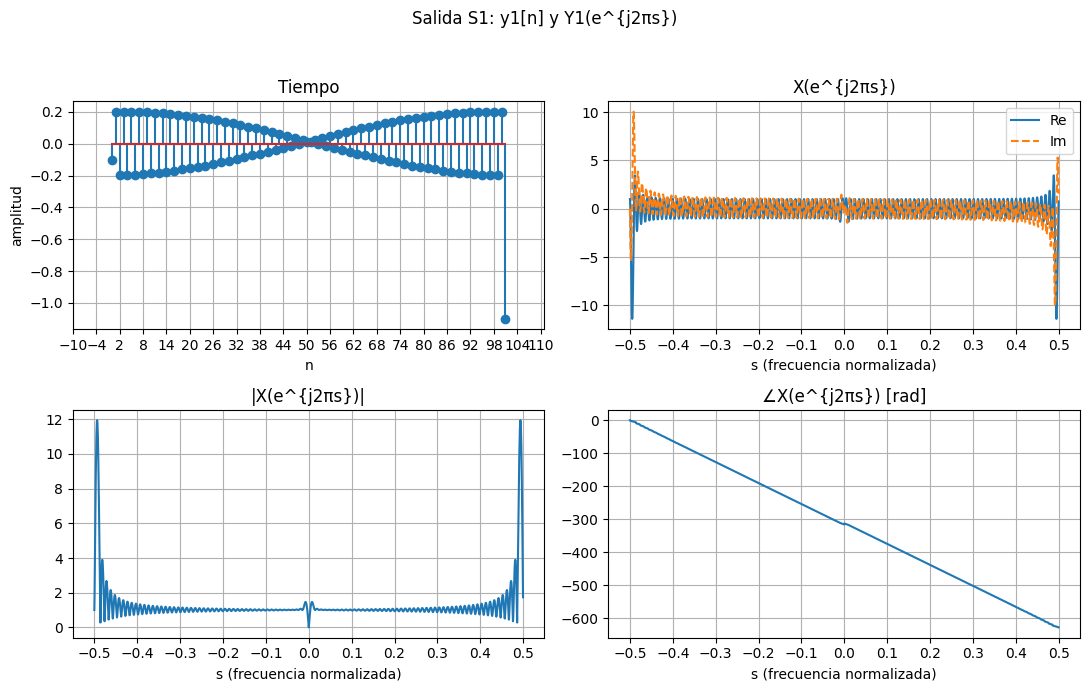

Error máximo ||Y1 - X1·H1|| en la rejilla s: 5.086e-13


In [10]:
# ------------------------------------------------------------
# Grilla B: y1 y Y1
# ------------------------------------------------------------
ny1, y1 = conv_discrete(nx, x, nh1, h1)
sY, Y1 = tftd_numeric(ny1, y1, s=sX, N_window=None)
plot_grid_time_freq(ny1, y1, sY, Y1, title_prefix="Salida S1: y1[n] y Y1(e^{j2πs})")

# ------------------------------------------------------------
# Verificación espectral: Y1 ≈ X1 · H1 (misma rejilla sX)
# ------------------------------------------------------------
if sX.shape == sH.shape and np.allclose(sX, sH):
    err_max = np.max(np.abs(Y1 - X * H1))
    print(f"Error máximo ||Y1 - X1·H1|| en la rejilla s: {err_max:.3e}")
else:
    print("Advertencia: las rejillas de frecuencia no coinciden; omitiendo verificación.")